# Demo: Image Generation with Discovered Concept Vectors

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from model import MLP
from utils_model import load_weights
import json

### Load stable diffusion

In [2]:
device='cuda'
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
).to(device)

### Load the concept vector model
Note that the model is implemented as a pytorch MLP layer. However, it just works as a lookup table of concept vectors

In [3]:
mlp=MLP(input_dim=8, resolution=512//64).to(device)
pipe.unet.set_controlnet(mlp)
pipe.unet=load_weights(pipe.unet, 'checkpoints/unet.pth')

concept_dict = json.load(open("checkpoints/concept_dict.json","r"))

### Inference without concept vector

  0%|          | 0/50 [00:00<?, ?it/s]

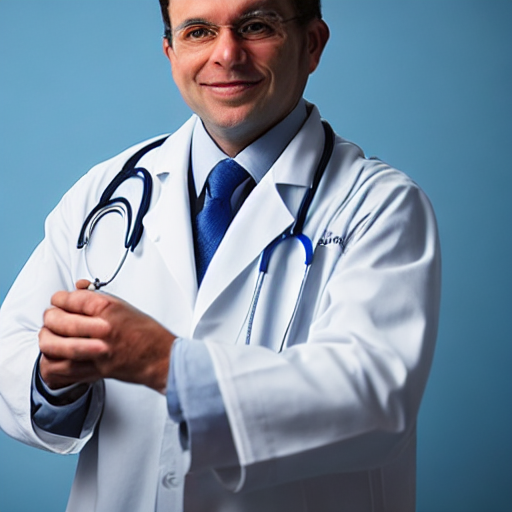

In [4]:
gen = torch.Generator(device=device)

prompt = 'a picture of a doctor'
seed= 3967113
scale=7.5

gen.manual_seed(seed)

out = pipe(prompt=prompt, generator=gen, guidance_scale=scale)
out.images[0]

### Inference with concept vector

  0%|          | 0/50 [00:00<?, ?it/s]

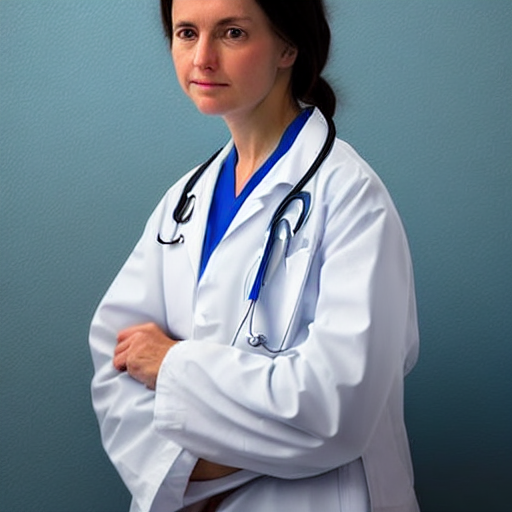

In [5]:
# specify which concept vector to use.
condition=torch.zeros(1,len(concept_dict), device=device)
condition[:,concept_dict['female']]=1


gen = torch.Generator(device=device)

prompt = 'a photo of a doctor'
seed= 3967113
scale=7.5

gen.manual_seed(seed)

out = pipe(prompt=prompt, generator=gen, guidance_scale=scale, controlnet_cond=condition)
display(out.images[0])

Note: if you would like to try sensible concepts related to safety, please disable the safety_checker by pipe.safety_checker=None. Please use it cautiously.